In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
# creating the data download url 
download_root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL= download_root + HOUSING_PATH + '/housing.tgz'

In [3]:
#creating a functioin to automatically fetch the housing dataset
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url,tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path = housing_path)
  housing_tgz.close()

In [4]:
import pandas as pd

In [5]:
# creating a function to load the data
def load_housing_data(housing_path = HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [6]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
#  housing.info()

In [8]:
# housing.describe()

In [9]:
housing.to_csv('Housingg.csv')

In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

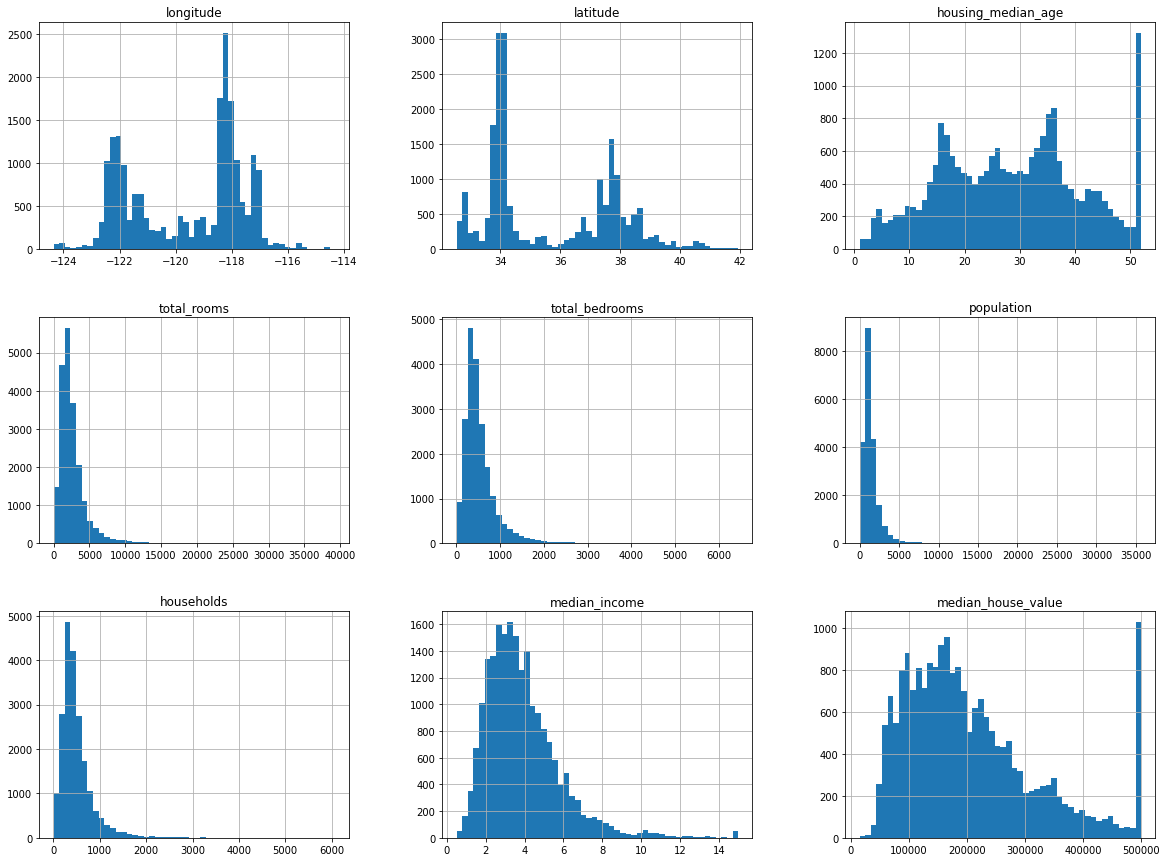

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20,15))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 10)

In [ ]:
print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


In [ ]:
import numpy as np
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']<5, 5, inplace = True)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 10)
for train_index, test_index in split.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [ ]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [ ]:
# # removing the income_cat column from housing dataset so that it returs to its original state
# for set in (strat_train_set, strat_test_set):
#   set.drop(['income_cat'],axis = 1,inplace = True)

In [ ]:
# #which can also be done as
housing.drop('income_cat', axis = 1, inplace = True)

In [ ]:
# housing

In [ ]:
strat_train_set.drop('income_cat', axis = 1, inplace = True)
housing_train = strat_train_set.copy()

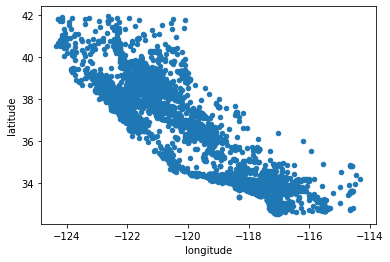

In [ ]:
housing_train.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

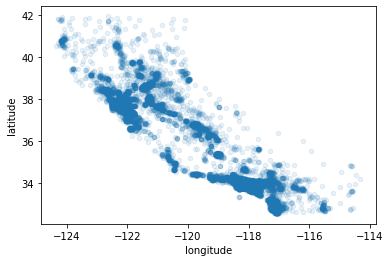

In [ ]:
# this helps in visualizing where the house density is more
housing_train.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

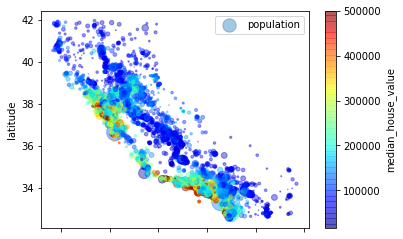

In [ ]:
housing_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing_train["population"]/100, label="population",
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()


In [ ]:
# looking for correlations
corr_matrix = housing_train.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688214
total_rooms           0.133785
housing_median_age    0.105336
households            0.065036
total_bedrooms        0.048016
population           -0.025355
longitude            -0.047002
latitude             -0.142754
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd13399d5d0>,
      dtype=object)

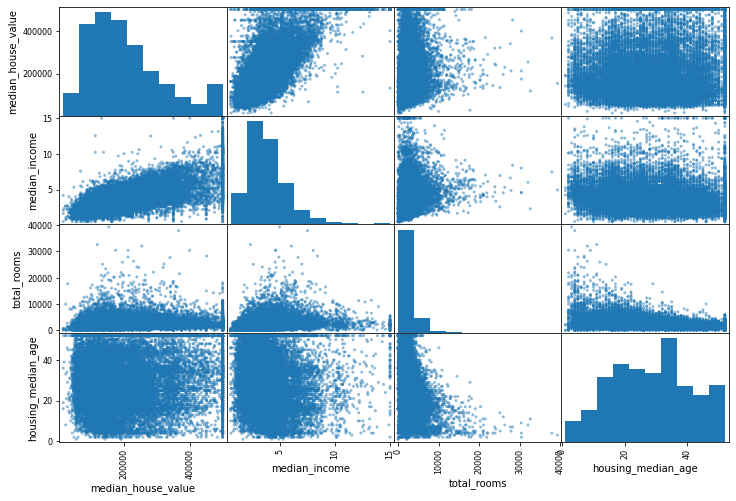

In [ ]:
# looking for correlations using pandas' scatter matrix
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize = (12,8))

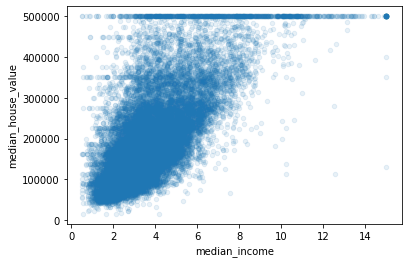

In [ ]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)

**Attribute Combinations**

In [ ]:
housing_train["rooms_per_household"] = housing_train["total_rooms"]/housing_train["households"]
housing_train["bedrooms_per_room"] = housing_train["total_bedrooms"]/housing_train["total_rooms"]
housing_train["population_per_household"]=housing_train["population"]/housing_train["households"]


In [ ]:
#looking for correlations one more time
corrr_matrix = housing_train.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688214
total_rooms           0.133785
housing_median_age    0.105336
households            0.065036
total_bedrooms        0.048016
population           -0.025355
longitude            -0.047002
latitude             -0.142754
Name: median_house_value, dtype: float64

**Data Cleaning and Transformations**

In [ ]:
housing_train = strat_train_set.drop("median_house_value", axis = 1 )
housing_train_labels = strat_train_set["median_house_value"].copy()

In [ ]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 6229 to 10003
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16351 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
#working with the missing parts - total_bedrooms has a number of missing values - none of these will affect the original dataset unless inplace = True is used
#1. removing the rows with NaN values
housing_train.dropna(subset = ['total_bedrooms'])
# 2. removing the whole 'total_bedrooms' attribute
housing_train.drop("total_bedrooms", axis = 1)
# 3. replacing the missing values with median
median_bedrooms = housing_train['total_bedrooms'].median()
housing_train.fillna(median_bedrooms)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6229,-117.94,34.06,32.0,3418.0,662.0,2003.0,622.0,4.0333,<1H OCEAN
4117,-118.22,34.14,52.0,2298.0,406.0,1203.0,387.0,5.5291,<1H OCEAN
13371,-117.54,34.11,16.0,2114.0,374.0,1463.0,399.0,3.9241,INLAND
16727,-120.76,35.52,7.0,9613.0,1666.0,4487.0,1653.0,3.6667,<1H OCEAN
7884,-118.13,33.87,20.0,3638.0,868.0,2326.0,822.0,3.3304,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
1355,-121.92,38.03,16.0,2176.0,464.0,1410.0,434.0,3.5436,INLAND
13572,-117.28,34.14,40.0,2190.0,496.0,1214.0,493.0,2.3947,INLAND
5607,-118.30,33.79,21.0,1068.0,283.0,1180.0,274.0,2.5000,<1H OCEAN
9981,-122.27,38.53,22.0,678.0,137.0,336.0,103.0,4.4000,INLAND


In [ ]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 6229 to 10003
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16351 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
# Using sklearn's Imputer to take care of missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')   #creating a SimpleImputer instance with strategy = median
housing_train_num = housing_train.drop('ocean_proximity', axis = 1) #dropping the ocean_proximity column to work with numerical attributes only
imputer.fit(housing_train_num)   #fitting the imputer instance to the training data


SimpleImputer(strategy='median')

In [ ]:
# imputer has just calculater the median values of each feature and stored in its statistics_ instance variable
print(imputer.statistics_)
#conforming
print(housing_train_num.median().values)

[-118.51      34.26      29.      2129.       435.      1164.
  410.         3.53275]
[-118.51      34.26      29.      2129.       435.      1164.
  410.         3.53275]


In [ ]:
# using the trained imputer to transform the training set by replacing the missing values by learned medians
X = imputer.transform(housing_train_num)   
# The result is a plain Numpy array containing the transformed features. If you want to
# put it back into a Pandas DataFrame, it’s simple
housing_tr =pd.DataFrame(X, columns=  housing_train_num.columns) 

**Handling Text and Categorical Attributes**


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()   #creating a LabelEncoder instance
housing_train_cat = housing_train['ocean_proximity']
housing_train_cat_encoded = encoder.fit_transform(housing_train_cat)
housing_train_cat_encoded

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
 print(encoder.classes_)


['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_train_cat_1hot = encoder.fit_transform(housing_train_cat_encoded.reshape(-1,1))
housing_train_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
 housing_train_cat_1hot.toarray()


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_train_cat_1hot = encoder.fit_transform(housing_train_cat)
housing_train_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
  self.add_bedrooms_per_room = add_bedrooms_per_room
 def fit(self, X, y=None):
  return self # nothing else to do
 def transform(self, X, y=None):
  rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
  population_per_household = X[:, population_ix] / X[:, household_ix]
  if self.add_bedrooms_per_room:
    bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
    return np.c_[X, rooms_per_household, population_per_household,
    bedrooms_per_room]
  else:
    return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_train_num)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
 def __init__(self, attribute_names):
  self.attribute_names = attribute_names
 def fit(self, X, y=None):
  return self
 def transform(self, X):
  return X[self.attribute_names].values

In [ ]:

# from sklearn_features.transformers import DataFrameSelector
from sklearn.pipeline import FeatureUnion
num_attribs = list(housing_train_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
 ('selector', DataFrameSelector(num_attribs)),
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
cat_pipeline = Pipeline([
 ('selector', DataFrameSelector(cat_attribs)),
 ('label_binarizer', LabelBinarizer()),
 ])
full_pipeline = FeatureUnion(transformer_list=[
 ("num_pipeline", num_pipeline),
 ("cat_pipeline", cat_pipeline),
 ])

In [ ]:
# housing_train_prepared = full_pipeline.fit_transform(housing_train)
# housing_train_prepared

TypeError: ignored

**Training and Evaluating on the Training set**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [ ]:
housing_train_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
6229,-117.94,34.06,32.0,3418.0,662.0,2003.0,622.0,4.0333
4117,-118.22,34.14,52.0,2298.0,406.0,1203.0,387.0,5.5291
13371,-117.54,34.11,16.0,2114.0,374.0,1463.0,399.0,3.9241
16727,-120.76,35.52,7.0,9613.0,1666.0,4487.0,1653.0,3.6667
7884,-118.13,33.87,20.0,3638.0,868.0,2326.0,822.0,3.3304
...,...,...,...,...,...,...,...,...
1355,-121.92,38.03,16.0,2176.0,464.0,1410.0,434.0,3.5436
13572,-117.28,34.14,40.0,2190.0,496.0,1214.0,493.0,2.3947
5607,-118.30,33.79,21.0,1068.0,283.0,1180.0,274.0,2.5000
9981,-122.27,38.53,22.0,678.0,137.0,336.0,103.0,4.4000


In [ ]:
housing_train_num.isnull().sum()

0

In [ ]:
median_train_bedrooms = housing_train_num['total_bedrooms'].median()

In [ ]:
median_train_bedrooms

435.0

In [ ]:
housing_train_num = housing_train_num['total_bedrooms'].fillna(median_train_bedrooms)

In [ ]:
some_data = housing_train_num.iloc[:5]

In [ ]:

some_labels =  housing_train_labels.iloc[:5]

In [ ]:
lin_reg.predict(some_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
some_labels

6229     210200.0
4117     274600.0
13371    131500.0
16727    250600.0
7884     194600.0
Name: median_house_value, dtype: float64

In [ ]:
some_data

6229      662.0
4117      406.0
13371     374.0
16727    1666.0
7884      868.0
Name: total_bedrooms, dtype: float64

In [ ]:
housing_train_num.iloc[:5]

6229      662.0
4117      406.0
13371     374.0
16727    1666.0
7884      868.0
Name: total_bedrooms, dtype: float64